# **Multi-Label Classification**

In [1]:
# example of a multi-label classification task
from sklearn.datasets import make_multilabel_classification
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# define dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, 
                                      n_classes=3, n_labels=2, random_state=1)

In [3]:
# summarize dataset shape
print(X.shape, y.shape)

print("-----------------------------------------------------------------------")
# summarize first few examples
for i in range(10):
    print("Exp ",i," : Features ",X[i], "  =>  Labels ", y[i])

(1000, 10) (1000, 3)
-----------------------------------------------------------------------
Exp  0  : Features  [ 3.  3.  6.  7.  8.  2. 11. 11.  1.  3.]   =>  Labels  [1 1 0]
Exp  1  : Features  [7. 6. 4. 4. 6. 8. 3. 4. 6. 4.]   =>  Labels  [0 0 0]
Exp  2  : Features  [ 5.  5. 13.  7.  6.  3.  6. 11.  4.  2.]   =>  Labels  [1 1 0]
Exp  3  : Features  [1. 1. 5. 5. 7. 3. 4. 6. 4. 4.]   =>  Labels  [1 1 1]
Exp  4  : Features  [ 4.  2.  3. 13.  7.  2.  4. 12.  1.  7.]   =>  Labels  [0 1 0]
Exp  5  : Features  [ 4.  3.  3.  2.  5.  2.  3.  7.  2. 10.]   =>  Labels  [0 0 0]
Exp  6  : Features  [ 3.  3.  3. 11.  6.  3.  4. 14.  1.  3.]   =>  Labels  [0 1 0]
Exp  7  : Features  [ 2.  1.  7.  8.  4.  5. 10.  4.  6.  6.]   =>  Labels  [1 1 1]
Exp  8  : Features  [ 5.  1.  9.  5.  3.  4. 11.  8.  1.  8.]   =>  Labels  [1 1 1]
Exp  9  : Features  [ 2. 11.  7.  6.  2.  2.  9. 11.  9.  3.]   =>  Labels  [1 1 1]


In [4]:
from sklearn.model_selection import train_test_split

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("X_train : ",X_train.shape," y_train : ",y_train.shape)
print("X_test  : ",X_test.shape," y_test : ",y_test.shape)


X_train :  (700, 10)  y_train :  (700, 3)
X_test  :  (300, 10)  y_test :  (300, 3)


In [5]:
n_outputs = 3

# Define the model
model = keras.Sequential()
model.add(keras.layers.Dense(32,  activation="relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(n_outputs, activation="sigmoid"))

# Compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[keras.metrics.BinaryAccuracy()])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
9/9 [==============================] - 3s 25ms/step - loss: 1.1233 - binary_accuracy: 0.5631 - val_loss: 1.0243 - val_binary_accuracy: 0.6000
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.8032 - binary_accuracy: 0.6417 - val_loss: 0.7276 - val_binary_accuracy: 0.7071
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5927 - binary_accuracy: 0.7161 - val_loss: 0.5519 - val_binary_accuracy: 0.7762
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.4830 - binary_accuracy: 0.7631 - val_loss: 0.4680 - val_binary_accuracy: 0.7905
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4258 - binary_accuracy: 0.8018 - val_loss: 0.4289 - val_binary_accuracy: 0.8095
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3942 - binary_accuracy: 0.8208 - val_loss: 0.4116 - val_binary_accuracy: 0.8143
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3739

9/9 [==============================] - 0s 12ms/step - loss: 0.1729 - binary_accuracy: 0.9310 - val_loss: 0.2453 - val_binary_accuracy: 0.9071
Epoch 55/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1754 - binary_accuracy: 0.9345 - val_loss: 0.2369 - val_binary_accuracy: 0.9024
Epoch 56/100
9/9 [==============================] - 0s 11ms/step - loss: 0.1713 - binary_accuracy: 0.9345 - val_loss: 0.2451 - val_binary_accuracy: 0.9048
Epoch 57/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1694 - binary_accuracy: 0.9345 - val_loss: 0.2373 - val_binary_accuracy: 0.9024
Epoch 58/100
9/9 [==============================] - 0s 11ms/step - loss: 0.1689 - binary_accuracy: 0.9357 - val_loss: 0.2384 - val_binary_accuracy: 0.9048
Epoch 59/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1676 - binary_accuracy: 0.9393 - val_loss: 0.2326 - val_binary_accuracy: 0.9024
Epoch 60/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1665 - b

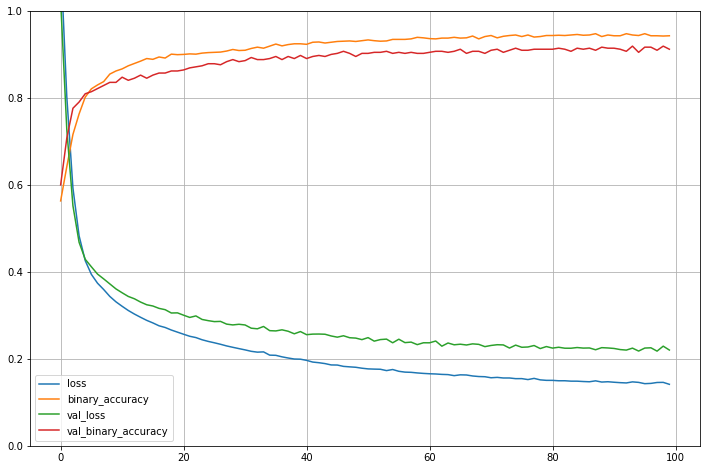

-----------------------------------------------------------------------
10/10 [==============================] - 0s 5ms/step - loss: 0.1735 - binary_accuracy: 0.9311
Loss     :  0.17345736920833588
accuracy :  0.9311111569404602


In [6]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


In [7]:
from sklearn.metrics import  accuracy_score

y_pred = model.predict(X_test)
# round probabilities to class labels
y_pred = y_pred.round()
print(y_pred[:5])
print("Accuracy     : ",accuracy_score(y_test, y_pred))

[[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 1. 0.]]
Accuracy     :  0.8566666666666667


In [8]:
y_test[:5]

array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 0],
       [0, 1, 0]])

In [9]:
y_pred = model.predict(X_test)

In [12]:
y_pred[:5]

array([[9.9999845e-01, 1.6539965e-03, 6.1698863e-04],
       [9.9724764e-01, 9.4700176e-01, 5.4964732e-04],
       [9.4092155e-01, 9.7515464e-01, 9.6602470e-01],
       [9.6988028e-01, 9.9534565e-01, 5.9837669e-01],
       [1.0298220e-01, 9.9776721e-01, 3.6251785e-03]], dtype=float32)

In [ ]:
0.99 0.0016 .00061
1      0       0

In [13]:
y_pred[:5].round()

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 1., 0.]], dtype=float32)